## Aim : To predict Predict species of iris 

## 1. Import  Libraries

In [291]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
#from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score ,  precision_score , f1_score , recall_score , classification_report
from sklearn.model_selection import GridSearchCV

## 2. Data Collection

In [292]:
df = pd.read_csv('E:\ML_Datasets/IRIS.csv')

In [293]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 3. EDA

## 1. Head

In [294]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Tail

In [295]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 3. shape

In [296]:
df.shape

(150, 5)

## 4. size

In [297]:
df.size

750

## 5.columns

In [298]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 6. dtypes

In [299]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## 7.Info

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 8.Check missing values

In [301]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 9.skewness

In [302]:
df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

## 10.check duplicate values

In [303]:
df.duplicated().sum()

3

In [304]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## 11. describe

In [305]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 12.correleation

In [306]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

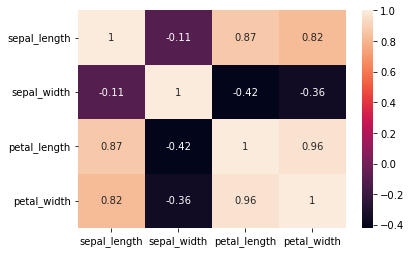

In [307]:
sns.heatmap(df.corr() , annot = True)

## 13.unique values

In [308]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [309]:
unique_values = df['species'].value_counts().index

In [310]:
unique_values

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [311]:
count = df['species'].value_counts().values

In [312]:
count

array([50, 50, 50], dtype=int64)

## 4. Data Visulaisation

### 1. Countplot

In [313]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

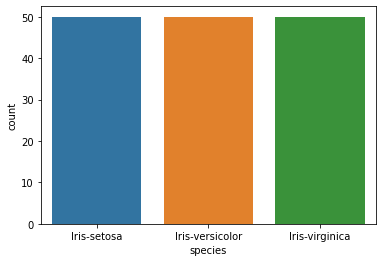

In [314]:
sns.countplot(df['species'])

### 2. Pieplot

In [315]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [316]:
label = df['species'].value_counts().index

In [317]:
label

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [318]:
value = df['species'].value_counts().values

In [319]:
value

array([50, 50, 50], dtype=int64)

([<matplotlib.patches.Wedge at 0x27d909c5f40>,
 [Text(0.6499999648639682, 1.125833045205567, 'Iris-setosa'),
  Text(-1.2999999999999945, -1.2171478395895002e-07, 'Iris-versicolor'),
  Text(0.6500001756801507, -1.1258329234907698, 'Iris-virginica')],
 [Text(0.3999999783778265, 0.6928203355111181, ' 33%'),
  Text(-0.7999999999999966, -7.490140551320001e-08, ' 33%'),
  Text(0.40000010811086195, -0.6928202606097045, ' 33%')])

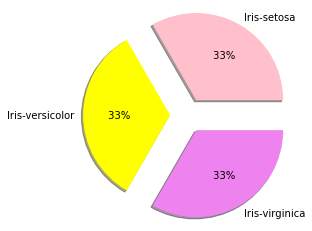

In [320]:
plt.pie(value,
    explode=(0.2 ,0.2 ,0.2),
    labels=label,
    colors=['pink','yellow','violet'],
    autopct='% 1.0f%%',
    pctdistance=0.6,
    shadow=True,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    normalize=None,
    data=None)

### map function for mapping values

In [321]:
#df['species'] = df['species'].map({'Iris-setosa': 0 , 'Iris-versicolor':1, 'Iris-vergininca':2})

## ProfileReport

In [322]:
#pandas_profiling.ProfileReport(df)

### 3.Pairplot

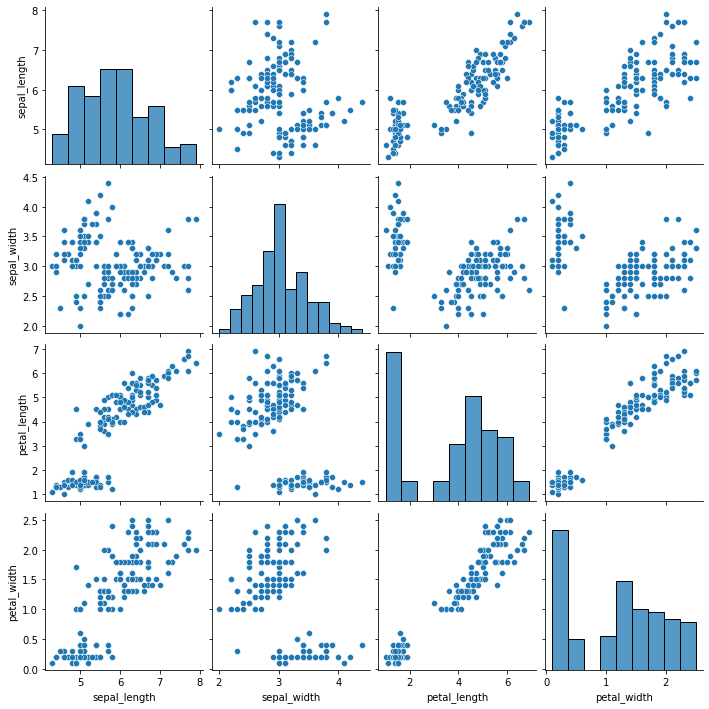

In [323]:
sns.pairplot(df)

### 4. Histplot

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

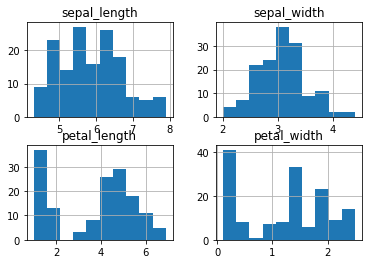

In [324]:
df.hist()

#### sepal length

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

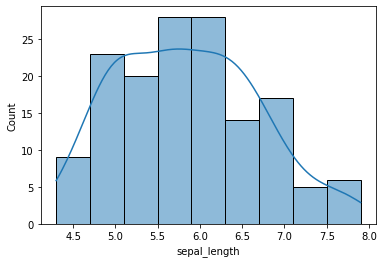

In [325]:
sns.histplot(df['sepal_length'] , kde = True)

#### sepal width

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

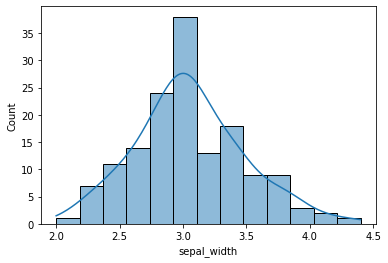

In [326]:
sns.histplot(df['sepal_width'] , kde = True)

#### petal length

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

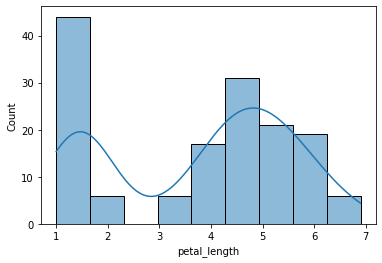

In [327]:
sns.histplot(df['petal_length'] , kde = True)

#### petal width

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

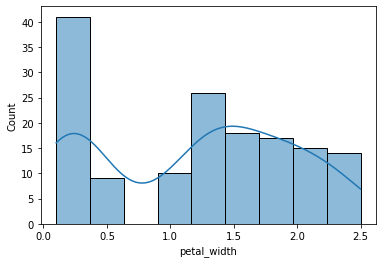

In [328]:
sns.histplot(df['petal_width'] , kde = True)

#### 4. Boxplot

<AxesSubplot:>

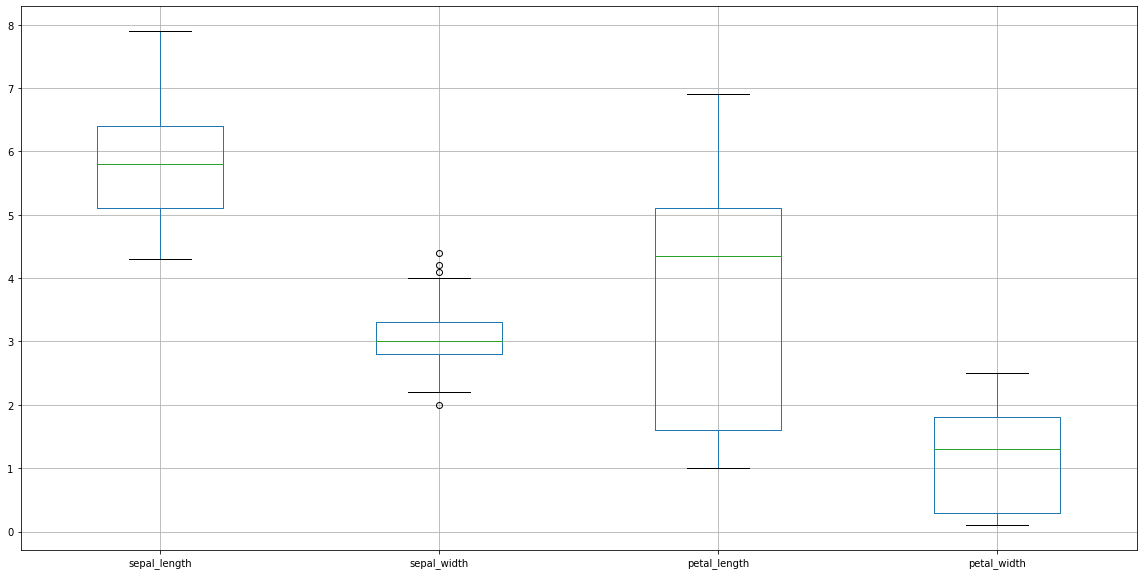

In [329]:
plt.figure(figsize = (20, 10))
df.boxplot()

### How to treate outliers

#### 1. Visualise 

<AxesSubplot:xlabel='sepal_width'>

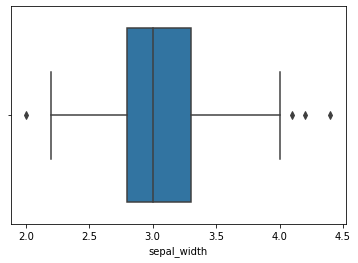

In [330]:
sns.boxplot(df['sepal_width'])

#### 2. Skewness

In [331]:
print('skewness of sepal_width is :',df['sepal_width'].skew())

skewness of sepal_width is : 0.3340526621720866


#### 3. IQR : InterQuartile Range

In [332]:
Q1 = np.percentile(df['sepal_width'] , 25 , interpolation = 'midpoint')
Q2 = np.percentile(df['sepal_width'] , 50 , interpolation = 'midpoint')
Q3 = np.percentile(df['sepal_width'] , 75 , interpolation = 'midpoint')

print('First Quadrant of sepal width is :' , Q1)
print('Second Quadrant of sepal width is :' , Q2)
print('Third Quadrant of sepal width is :' , Q3)


IQR = Q3 - Q1

print('InterQuartile Range is :' , IQR)

whisker_width = 1.5

low_lim  = Q1 - (whisker_width * IQR)
high_lim = Q3 + (whisker_width * IQR)


print('minimum value of sepal_width is :' , low_lim)
print('maximum value of sepal_width is :' , high_lim)


index = df[(df['sepal_width'] > high_lim) | (df['sepal_width'] < low_lim)].index

print(index)

outliers = index = df[(df['sepal_width'] > high_lim) | (df['sepal_width'] < low_lim)]
print('outliers are :' , outliers)


median = np.median(df['sepal_width'])
print('median is :' , median)


df.loc[df.sepal_width > high_lim, 'sepal_width'] = np.nan
df.loc[df.sepal_width < low_lim, 'sepal_width'] = np.nan

df.fillna(median,inplace=True)

First Quadrant of sepal width is : 2.8
Second Quadrant of sepal width is : 3.0
Third Quadrant of sepal width is : 3.3
InterQuartile Range is : 0.5
minimum value of sepal_width is : 2.05
maximum value of sepal_width is : 4.05
Int64Index([15, 32, 33, 60], dtype='int64')
outliers are :     sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor
median is : 3.0


### After treated of outliers

<AxesSubplot:>

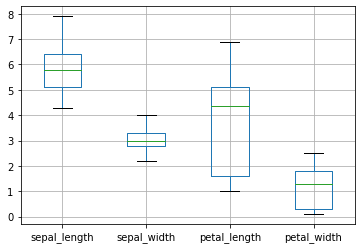

In [333]:
df.boxplot()

In [334]:
df.iloc[[15 ,32 , 33 , 60], :]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,3.0,1.5,0.4,Iris-setosa
32,5.2,3.0,1.5,0.1,Iris-setosa
33,5.5,3.0,1.4,0.2,Iris-setosa
60,5.0,3.0,3.5,1.0,Iris-versicolor


### 5. Feature Engineering

#### 1. Data split into independent variable and dependent variable

In [335]:
x = df.iloc[: ,:-1]
y = df.iloc[: , -1]

In [336]:
x.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [337]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: species, dtype: object

#### 2.Data split into train and test

In [338]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [339]:
x_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,3.0,1.5,0.4


In [340]:
x_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [341]:
y_train.head(2)

22    Iris-setosa
15    Iris-setosa
Name: species, dtype: object

In [342]:
y_test.head(2)

73    Iris-versicolor
18        Iris-setosa
Name: species, dtype: object

### 6. Model Building

In [343]:
model_gini = DecisionTreeClassifier(criterion = 'gini' , splitter = 'best')

#### Fit the training model

In [344]:
model_gini.fit(x_train , y_train)

DecisionTreeClassifier()

#### Prediction Output

In [345]:
y_pred = model_gini.predict(x_test)

In [346]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

#### Training Accuracy

In [347]:
Training_Accuracy = model_gini.score(x_train , y_train)

In [348]:
Training_Accuracy

1.0

#### Testing Accuracy

In [349]:
Testing_Accuracy = model_gini.score(x_test , y_test)

In [350]:
Testing_Accuracy

1.0

### Here we nofacing overfit and underfit issue . model is most generalised . but its trival solution

#### Text Representation

In [351]:
text_representation = tree.export_text(model_gini , feature_names = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])

In [352]:
print(text_representation)

|--- petal_width <= 0.80
|   |--- class: Iris-setosa
|--- petal_width >  0.80
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_length <= 5.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- sepal_length >  5.95
|   |   |   |   |   |--- class: Iris-

#### plot decision Tree

[Text(343.38461538461536, 504.7714285714286, 'petal_width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = p'),
 Text(257.53846153846155, 427.11428571428576, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = s'),
 Text(429.23076923076917, 427.11428571428576, 'petal_length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = p'),
 Text(171.69230769230768, 349.4571428571429, 'petal_width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = p'),
 Text(85.84615384615384, 271.8, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = p'),
 Text(257.53846153846155, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = e'),
 Text(686.7692307692307, 349.4571428571429, 'petal_width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = e'),
 Text(429.23076923076917, 271.8, 'petal_length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = p'),
 Text(343.38461538461536, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 

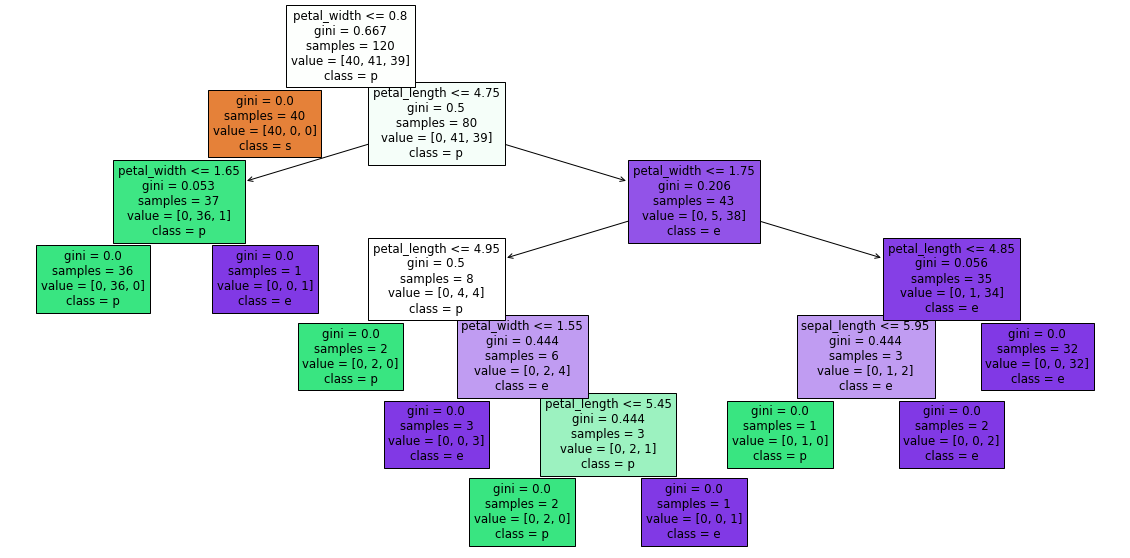

In [353]:
fig = plt.figure(figsize = (20 , 10))
from sklearn import tree
tree.plot_tree(model_gini , filled = True , feature_names= ['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width'],
    class_names='species')

In [354]:
fig.savefig('DT_iris.png')

### Hyperparameter Tuning by GridSearchCV (postpruning)

In [355]:
from sklearn.model_selection import GridSearchCV

In [356]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [357]:
gridsearchcv = GridSearchCV(model_gini ,param_grid = params , cv=3,
    verbose=1)

In [358]:
gridsearchcv

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

#### Fitting gridsearchcv

In [359]:
gridsearchcv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [360]:
gridsearchcv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4)

In [361]:
model_gini_cv = DecisionTreeClassifier(criterion = 'gini' , splitter = 'best' , max_leaf_nodes = 4)

In [362]:
model_gini_cv.fit(x_train , y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

[Text(372.0, 475.65000000000003, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = p'),
 Text(186.0, 339.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = s'),
 Text(558.0, 339.75, 'petal_length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = p'),
 Text(372.0, 203.85000000000002, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = p'),
 Text(744.0, 203.85000000000002, 'petal_width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = e'),
 Text(558.0, 67.94999999999999, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = p'),
 Text(930.0, 67.94999999999999, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = e')]

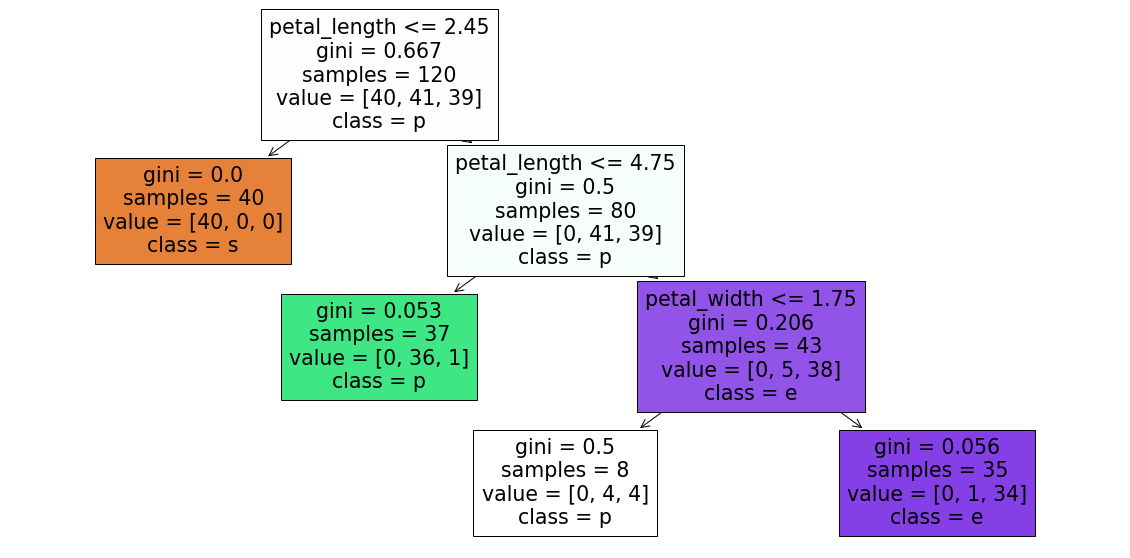

In [363]:
fig = plt.figure(figsize = (20 , 10))
tree.plot_tree(model_gini_cv ,filled = True, feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
    class_names='species')

### save figure in local system

In [364]:
fig.savefig('DT_iris_gridsearchcv.png')

### Performance Matrix or Cost Function

#### confusion Matrix

In [365]:
cm = confusion_matrix(y_test , y_pred)

In [366]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

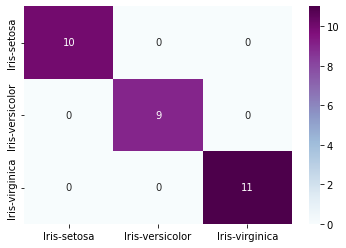

In [367]:
sns.heatmap(cm ,
    vmin=None,
    vmax=None,
    cmap='BuPu',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels=unique_values,
    yticklabels=unique_values,
    mask=None,
    ax=None,
 )

#### Accuracy Score

In [368]:
accuracy_score(y_test , y_pred)

1.0

#### precision score

In [369]:
precision_score (y_test , y_pred , average = 'macro')

1.0

#### Recall Score

In [370]:
recall_score(y_test , y_pred , average = 'macro')

1.0

####  f1 score

In [371]:
f1_score(y_test , y_pred , average = 'macro')

1.0

#### Classification Report

In [372]:
print(classification_report(y_test , y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### model on entropy

In [373]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy' , splitter = 'best')

#### Fit training model

In [374]:
model_entropy.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

#### Prediction Output

In [375]:
y_pred_entropy = model_entropy.predict(x_test)

In [376]:
y_pred_entropy

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

#### Training Accuracy

In [377]:
Training_Accuracy_entropy = model_entropy.score(x_train , y_train)

In [378]:
Training_Accuracy_entropy

1.0

#### Testing Accuracy

In [379]:
Testing_Accuracy_entropy = model_entropy.score(x_test , y_test)

In [380]:
Testing_Accuracy_entropy

1.0

#### Text Representation

In [381]:
text_representation_entropy = tree.export_text(model_entropy , feature_names = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])

In [382]:
print(text_representation_entropy)

|--- petal_length <= 2.45
|   |--- class: Iris-setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- sepal_length <= 6.95
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- sepal_length >  6.95
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_width <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- sepal_width >  3.10
|   |   |   |   |   |--- class: Iris-v

### Plot decisionTree

[Text(343.38461538461536, 504.7714285714286, 'petal_length <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]\nclass = p'),
 Text(257.53846153846155, 427.11428571428576, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = s'),
 Text(429.23076923076917, 427.11428571428576, 'petal_length <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]\nclass = p'),
 Text(171.69230769230768, 349.4571428571429, 'petal_width <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]\nclass = p'),
 Text(85.84615384615384, 271.8, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = p'),
 Text(257.53846153846155, 271.8, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = e'),
 Text(686.7692307692307, 349.4571428571429, 'petal_width <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]\nclass = e'),
 Text(429.23076923076917, 271.8, 'petal_length <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]\nclass = p'),
 Text(343.38461538461536, 194.14285714285717, 'entropy = 0

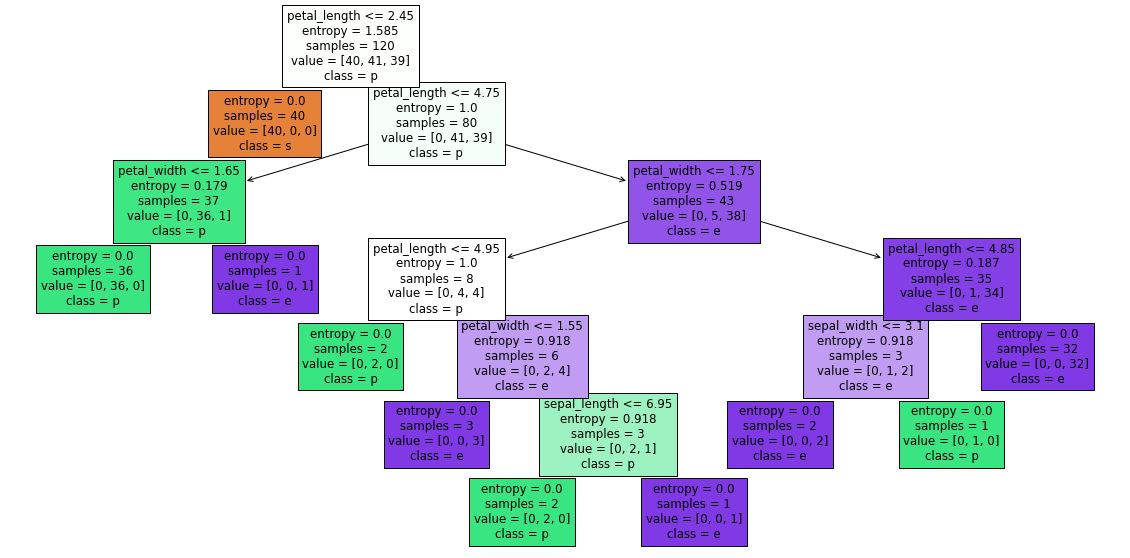

In [383]:
fig_entropy = plt.figure(figsize = (20 , 10))
tree.plot_tree(model_entropy , filled = True , feature_names = ['sepal_length','sepal_width' ,'petal_length' ,'petal_width'], class_names = 'species')

#### save in local system

In [384]:
fig_entropy.savefig('DT_iris_entropy.png')

#### GridSearchcv for hyperparametertuning

In [385]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [386]:
gridsearchcv_entropy = GridSearchCV(model_entropy , param_grid = params , verbose = 1  , cv = 3)

In [387]:
gridsearchcv_entropy

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [388]:
gridsearchcv_entropy.fit(x_train , y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

#### Best Paramter 

In [389]:
gridsearchcv_entropy.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=23)

#### Apply max leaf node for hyparametertuning

In [390]:
model_entropy_hyper = DecisionTreeClassifier(criterion = 'entropy' , splitter = 'best' , max_leaf_nodes = 9)

In [391]:
model_entropy_hyper

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9)

### Fit hyperparameter model

In [392]:
model_entropy_hyper.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9)

#### plot DecsionTree after pruning

[Text(343.38461538461536, 498.3, 'petal_width <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]\nclass = p'),
 Text(257.53846153846155, 407.70000000000005, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = s'),
 Text(429.23076923076917, 407.70000000000005, 'petal_length <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]\nclass = p'),
 Text(171.69230769230768, 317.1, 'petal_width <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]\nclass = p'),
 Text(85.84615384615384, 226.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = p'),
 Text(257.53846153846155, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = e'),
 Text(686.7692307692307, 317.1, 'petal_width <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]\nclass = e'),
 Text(429.23076923076917, 226.5, 'petal_length <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]\nclass = p'),
 Text(343.38461538461536, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\ncl

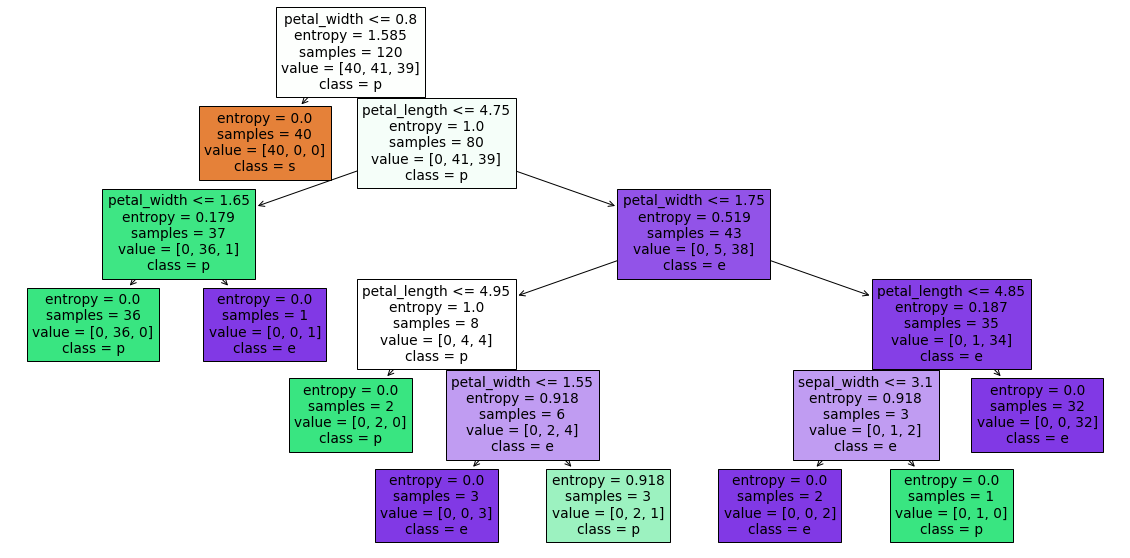

In [393]:
fig_entropy_hyper = plt.figure(figsize = (20 , 10))
tree.plot_tree(model_entropy_hyper ,filled = True , feature_names = ['sepal_length','sepal_width' ,'petal_length' ,'petal_width'], class_names = 'species')

In [394]:
fig_entropy_hyper.savefig('iris_classification_entropy_pruning.png')

### Performenance Matrix or Cost Function

#### confusion_matrix

In [395]:
cm_entropy = confusion_matrix(y_test , y_pred_entropy)

In [396]:
cm_entropy

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

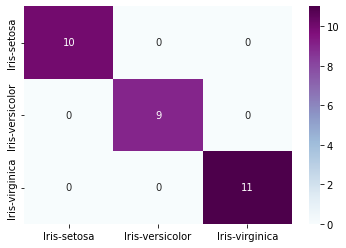

In [397]:
sns.heatmap(cm_entropy ,
    vmin=None,
    vmax=None,
    cmap='BuPu',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels=unique_values,
    yticklabels=unique_values,
    mask=None,
    ax=None)

#### Accuracy score

In [398]:
accuracy_score(y_test , y_pred_entropy)

1.0

#### Precision Score

In [399]:
precision_score(y_test , y_pred_entropy, average = 'macro')

1.0

#### Recall Score

In [400]:
recall_score(y_test , y_pred_entropy , average = 'macro')

1.0

#### f1 Score

In [401]:
f1_score(y_test , y_pred_entropy , average = 'macro')

1.0

#### Classsification Report

In [402]:
print(classification_report(y_test , y_pred_entropy))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

